# Linear regression with multiple variables
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.
The file ex1data2.txt contains a training set of housing prices in Port- land, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [29]:
import numpy as np
data = np.genfromtxt('ex1data2.txt', delimiter=',') #load the data
X = data[:, :2] # population  #all columns before column two, i.e., 0 and 1
y = data[:, 2] # profit
m = len(y)     # number of samples 

#Just for indexing purposes
X = X.reshape(m,2)
y = y.reshape(m,1)

# Print out some data points
print('First 10 examples from the dataset:')
print(X[:10,:])
print(y[:10,:])


First 10 examples from the dataset:
[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]]
[[399900.]
 [329900.]
 [369000.]
 [232000.]
 [539900.]
 [299900.]
 [314900.]
 [198999.]
 [212000.]
 [242500.]]


## Feature Normalization
By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.
Your task here is to complete the code to
• Subtract the mean value of each feature from the dataset.
• After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

In [30]:
def featureNormalize(X):
    ''' FEATURENORMALIZE Normalizes the features in X 
        FEATURENORMALIZE(X) returns a normalized version of X where
        the mean value of each feature is 0 and the standard deviation
        is 1. This is often a good preprocessing step to do when
        working with learning algorithms.
    '''

    # You need to set these values correctly
    X_norm = X;
    mu = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))

    # ====================== YOUR CODE HERE ======================
    # Instructions: First, for each feature dimension, compute the mean
    #               of the feature and subtract it from the dataset,
    #               storing the mean value in mu. Next, compute the 
    #               standard deviation of each feature and divide
    #               each feature by it's standard deviation, storing
    #               the standard deviation in sigma. 
    #
    #               Note that X is a matrix where each column is a 
    #               feature and each row is an example. You need 
    #               to perform the normalization separately for 
    #               each feature. 
    #
    # Hint: You might find the 'mean' and 'std' functions useful.
      
    mu = np.mean(X)
    sigma = np.std(X)

    X_norm = (X - mu) #Matrix minus scalar (element-wise)
    X_norm = np.divide(X_norm, sigma) #Matrix diveded by vector (element-wise), broadcasted to same shape

    return X_norm, mu, sigma

In [31]:
X, mu, sigma = featureNormalize(X);

# Add intercept term to X
X = np.concatenate((np.ones((m,1)), X), axis=1) # Add a column of ones to X

## Gradient Descent
In this part, you will fit the linear regression parameters θ to our dataset using gradient descent.

### Update Equations
The objective of linear regression is to minimize the cost function

$$ J(\theta)= \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)})−y^{(i)})^2 $$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x)=\theta^Tx=\theta_0 + \theta_1x_1 $$
Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update
$$\theta_j := \theta_j − \alpha\frac{1}{m}\sum_{i=1}^{m} (h_\theta(x^{(i)}) − y^{(i)})x^{(i)} \mathrm{(simultaneously ~ update ~} \theta_j \mathrm{~ for ~ all ~} j\mathrm{).} $$
With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.


In [32]:
def computeCostMulti(X, y, theta):
    ''' COMPUTECOSTMULTI Compute cost for linear regression
        J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
        parameter for linear regression to fit the data points in X and y
        X, y, and theta are numpy arrays/matrices
    '''

    # Initialize some useful values
    m = len(y) # number of training examples

    # You need to return the following variables correctly 
    J = 0
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.

    h = np.dot(X,theta)
    dif = h - y
    J = (1/(2*m)) * np.dot(dif.T,dif)

    return J.item()


In [33]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    '''GRADIENTDESCENTMULTI Performs gradient descent to learn theta
        theta = GRADIENTDESENTMULTI(X, y, theta, alpha, num_iters) updates theta by 
        taking num_iters gradient steps with learning rate alpha
    '''

    # Initialize some useful values
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))

    for iter in range(num_iters):

        # ====================== YOUR CODE HERE ======================
        # Instructions: Perform a single gradient step on the parameter vector theta. 
        # Hint: While debugging, it can be useful to print out the values
        #       of the cost function (computeCost) and gradient here.

        h = np.dot(X,theta)
        dif = h - y
        theta = theta - alpha * 1/m * np.dot(X.T,dif)
        
        # ============================================================
        # Save the cost J in every iteration    
        J_history[iter] = computeCostMulti(X, y, theta)
    return theta, J_history

Theta found by gradient descent: 
[[ 119999.41363909]
 [ 148539.68555667]
 [-104839.19814394]]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):  [295836.72047717]


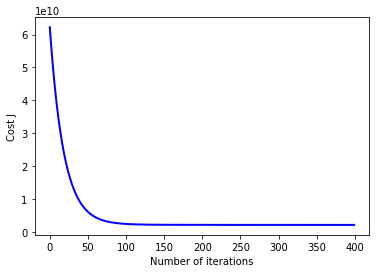

In [39]:
import matplotlib.pyplot as plt
# Choose some alpha value
alpha = 0.01
num_iters = 400

# Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# print theta to screen
print('Theta found by gradient descent: ')
print(theta)

# Plot convergence graph
plt.plot(range(len(J_history)), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations') #Set the x−axis label 
plt.ylabel('Cost J')

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================
# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.
house = np.array([1650,3])
house_norm = np.divide((house-mu),sigma)
house_norm = np.insert(house_norm,0,1)
price = np.dot(house_norm,theta)

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ', price);


